In [24]:
%%capture
!pip install pandas
!pip install azure-storage-blob
!pip intall matplotlib
!pip install seaborn


In [ ]:
from azure.storage.blob import BlobServiceClient
import pandas as pd
from io import BytesIO

In [ ]:
# Entering credentials
account_name = "your_account_name"
account_key = "your_account_key"
container_name = "your_cointainer_name"
blob_name = "name_of_blob"

In [ ]:
# Creating a client to interact with blob storage
# Creating a BlobServiceClient
blob_service_client = BlobServiceClient(account_url=f"https://{account_name}.blob.core.windows.net", credential=account_key)

# Getting a ContainerClient for the specified container
container_client = blob_service_client.get_container_client(container_name)

# Getting a BlobClient for the CSV blob
csv_blob_client = container_client.get_blob_client(blob_name)

# Downloading CSV blob content as bytes
csv_blob_data = csv_blob_client.download_blob()
csv_content = csv_blob_data.readall()

# Decoding bytes to string (assuming UTF-8 encoding)
csv_data = csv_content.decode('utf-8')

# Using Pandas to read CSV data into a DataFrame
df_csv = pd.read_csv(BytesIO(csv_content))

# Now 'df_csv' is a Pandas DataFrame containing the CSV data
df_csv.head()

<ipython-input-11-8ce7f21f6698>:19: DtypeWarning: Columns (9,11,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_csv = pd.read_csv(BytesIO(csv_content))


,securitytype,symbol,securityexchange,nanotime,currentsecuritytradingstate,transacttime,maturitymonthyear,securityid,currencycode,indc_opn_thcl_ind_px,...,volume,tradedate,asset,messagestatus,isuserdefinedinstrument,highTradePrice,lowTradePrice,settleDate,settlementpricedec,theoreticalprice
0,OPT,UD:WZ: 12 2877604,XCBT,196012091,NaN,2023-07-24 02:02:32.196,202309,2877604,USD,NaN,...,1.0,2023-07-24,OZW,NaN,U,NaN,NaN,NaN,NaN,NaN
1,OPT,UD:WZ: 12 2877604,XCBT,196012091,NaN,2023-07-24 02:02:32.196,202309,2877604,USD,NaN,...,NaN,2023-07-24,OZW,NaN,U,-0.5,NaN,NaN,NaN,NaN
2,OPT,UD:WZ: 12 2877604,XCBT,196012091,NaN,2023-07-24 02:02:32.196,202309,2877604,USD,NaN,...,NaN,2023-07-24,OZW,NaN,U,-0.5,-0.5,NaN,NaN,NaN
3,FUT,SR3H7,XCME,354334027,NaN,2023-07-24 02:03:39.354,202703,254041,USD,NaN,...,350.0,2023-07-24,SR3,NaN,H,NaN,NaN,NaN,NaN,NaN
4,FUT,SR3H7,XCME,356336945,NaN,2023-07-24 02:03:39.356,202703,254041,USD,NaN,...,351.0,2023-07-24,SR3,NaN,H,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Finding the duration of the data. Start and End
df_csv['transacttime'] = pd.to_datetime(df_csv['transacttime'], format='%Y-%m-%d %H:%M:%S.%f')

start_date = df_csv['transacttime'].min()
end_date = df_csv['transacttime'].max()

print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")

Start Date: 2023-07-24 00:00:00
End Date: 2023-07-24 23:59:59.999000


In [ ]:
# Checking for NaN values in the data
print("Nan values present in the data:")
print(df_csv.isna().sum())

Nan values present in the data:
securitytype                         0
symbol                               0
securityexchange                     0
nanotime                             0
currentsecuritytradingstate    5104813
transacttime                         0
maturitymonthyear                    0
securityid                           0
currencycode                         0
indc_opn_thcl_ind_px           5102944
lastTradedDisplayPrice         5104813
settlementpricefmt             4310292
highTradeDisplayPrice          5008713
hour                                 0
instrumentsequencenumber             0
recordtype                           0
marketsegmentid                      0
productgroup                   5104813
firstTradedDisplayPrice        5104813
underlyingProduct                    0
strategycode                   5104813
lowTradeDisplayPrice           5029547
volume                          892490
tradedate                            0
asset                           

In [ ]:
# Since majority of the columns had null values of more than 50%, I dropped all of them
# Removed columns with null values in the existing DataFrame

import pandas as pd
df_csv.dropna(axis=1, inplace=True)

df_csv.head()

,securitytype,symbol,securityexchange,nanotime,transacttime,maturitymonthyear,securityid,currencycode,hour,instrumentsequencenumber,recordtype,marketsegmentid,underlyingProduct,tradedate,asset,isuserdefinedinstrument
0,OPT,UD:WZ: 12 2877604,XCBT,196012091,2023-07-24 02:02:32.196,202309,2877604,USD,2,67,MDV,60,%22NOT_AVAILABLE%22,2023-07-24,OZW,U
1,OPT,UD:WZ: 12 2877604,XCBT,196012091,2023-07-24 02:02:32.196,202309,2877604,USD,2,70,OPNS,60,%22NOT_AVAILABLE%22,2023-07-24,OZW,U
2,OPT,UD:WZ: 12 2877604,XCBT,196012091,2023-07-24 02:02:32.196,202309,2877604,USD,2,71,OPNS,60,%22NOT_AVAILABLE%22,2023-07-24,OZW,U
3,FUT,SR3H7,XCME,354334027,2023-07-24 02:03:39.354,202703,254041,USD,2,78968,MDV,82,Interest Rate,2023-07-24,SR3,H
4,FUT,SR3H7,XCME,356336945,2023-07-24 02:03:39.356,202703,254041,USD,2,78984,MDV,82,Interest Rate,2023-07-24,SR3,H


In [ ]:
# Checking for NaN values in the data
print("columns with Nan values after removing the columns with Nan values :")
print(df_csv.isna().sum())

columns with Nan values after removing the columns with Nan values :
securitytype                0
symbol                      0
securityexchange            0
nanotime                    0
transacttime                0
maturitymonthyear           0
securityid                  0
currencycode                0
hour                        0
instrumentsequencenumber    0
recordtype                  0
marketsegmentid             0
underlyingProduct           0
tradedate                   0
asset                       0
isuserdefinedinstrument     0
dtype: int64


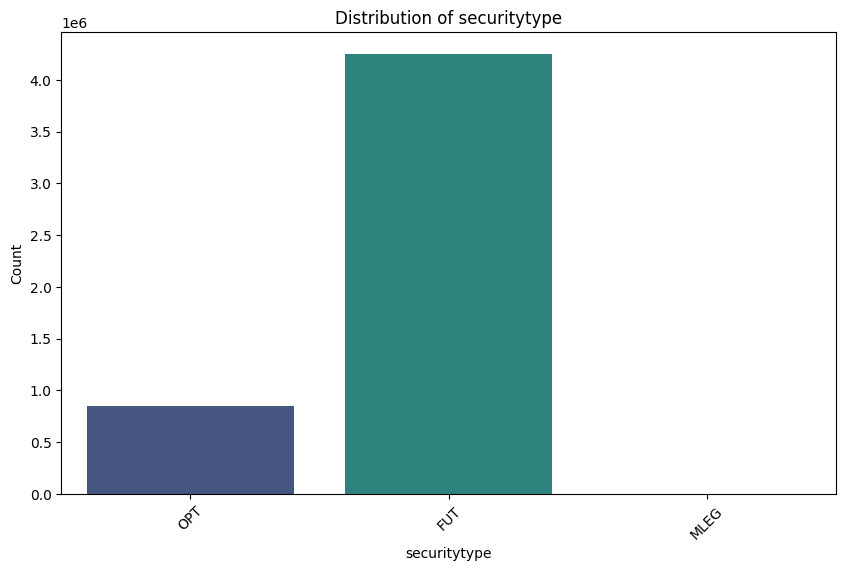

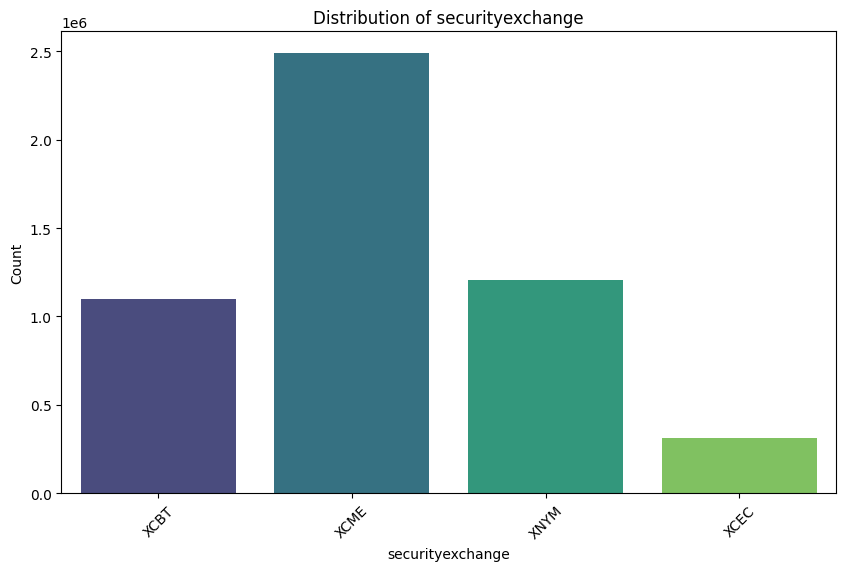

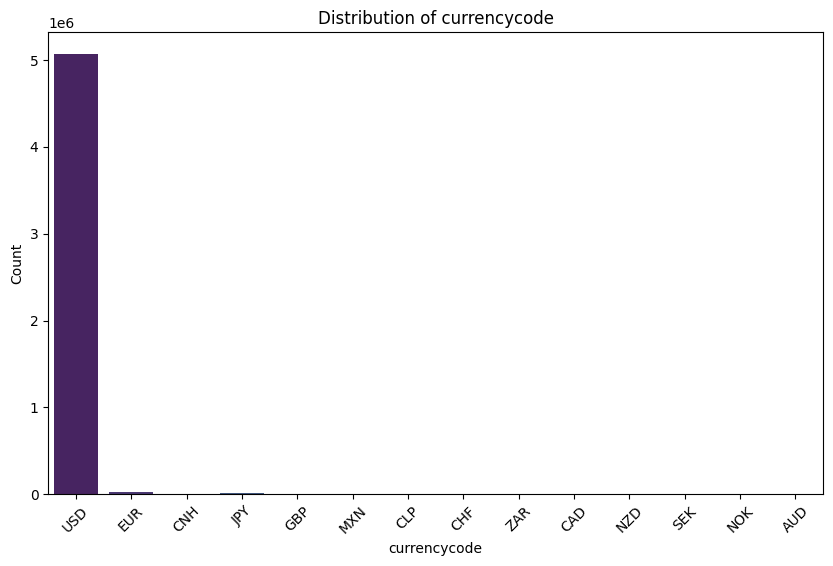

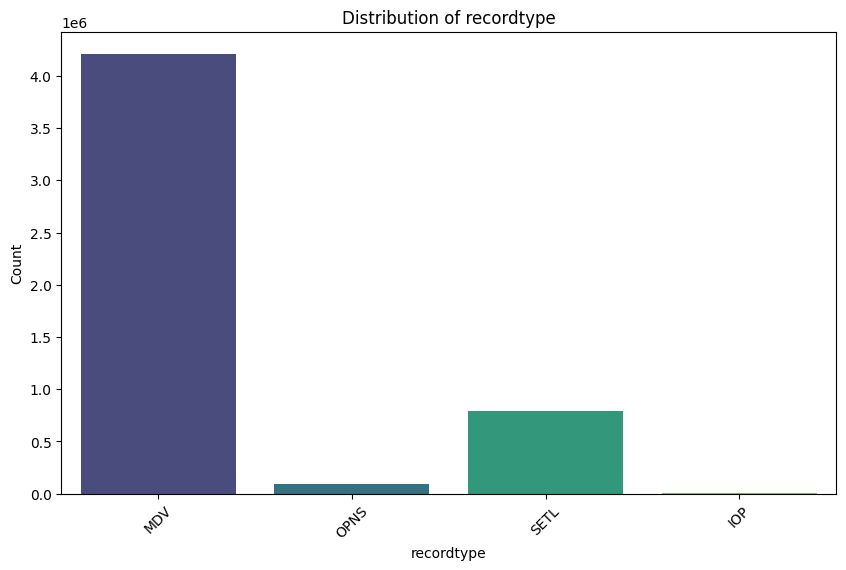

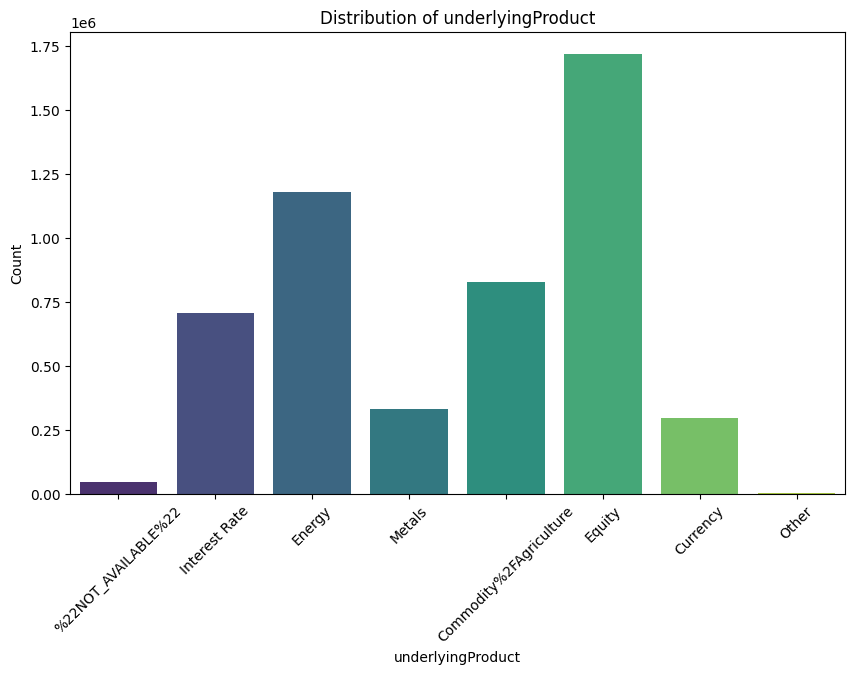

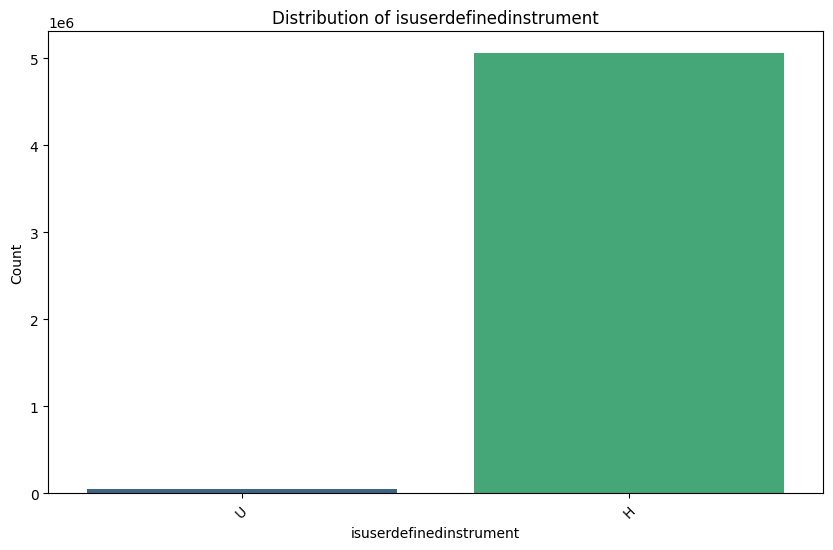

In [ ]:
# Visualizing the data to have a understand of the data.

import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = ['securitytype', 'securityexchange', 'currencycode', 'recordtype', 'underlyingProduct', 'isuserdefinedinstrument']
# removed 'marketsegmentid', 'asset' as the graph being presented were irrelavant

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df_csv, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()